In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv('Toyoto_Corrola.csv', index_col=0)
df.head()

,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Id,,,,,,,,,
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Model      1436 non-null   object
 1   Price      1436 non-null   int64 
 2   Age_08_04  1436 non-null   int64 
 3   KM         1436 non-null   int64 
 4   HP         1436 non-null   int64 
 5   Doors      1436 non-null   int64 
 6   Cylinders  1436 non-null   int64 
 7   Gears      1436 non-null   int64 
 8   Weight     1436 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 112.2+ KB


In [4]:
df.describe()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,5.000000,4.0,6.000000,1615.00000


In [5]:
df.isnull().sum()

Model        0
Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [6]:
df.columns

Index(['Model', 'Price', 'Age_08_04', 'KM', 'HP', 'Doors', 'Cylinders',
       'Gears', 'Weight'],
      dtype='object')

In [7]:
df.drop(columns='Model', inplace=True)
df.head()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Id,,,,,,,,
1,13500,23,46986,90,3,4,5,1165
2,13750,23,72937,90,3,4,5,1165
3,13950,24,41711,90,3,4,5,1165
4,14950,26,48000,90,3,4,5,1165
5,13750,30,38500,90,3,4,5,1170


<Axes: >

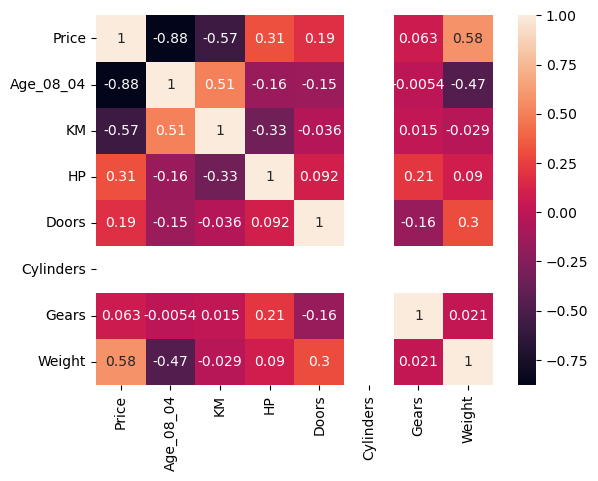

In [8]:
sns.heatmap(df.corr(), annot=True)

In [9]:
x = df[['Age_08_04', 'KM', 'HP', 'Doors', 'Cylinders','Gears', 'Weight']]
y = df[['Price']]

In [10]:
x.head()

,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Id,,,,,,,
1,23,46986,90,3,4,5,1165
2,23,72937,90,3,4,5,1165
3,24,41711,90,3,4,5,1165
4,26,48000,90,3,4,5,1165
5,30,38500,90,3,4,5,1170


In [11]:
y.head

<bound method NDFrame.head of       Price
Id         
1     13500
2     13750
3     13950
4     14950
5     13750
...     ...
1438   7500
1439  10845
1440   8500
1441   7250
1442   6950

[1436 rows x 1 columns]>

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 7)
(288, 7)
(1148, 1)
(288, 1)


In [14]:
model = LinearRegression()

In [15]:
model.fit(x_train, y_train)

LinearRegression()

In [16]:
model.score(x_train,y_train)*100

86.02180131302066

In [17]:
y_pred = model.predict(x_test)

In [18]:
df2 = pd.DataFrame
df2 = x_test
df2['actual_price'] = y_test
df2['predctd_price'] = y_pred
df2.head()

,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight,actual_price,predctd_price
Id,,,,,,,,,
362,41,24475,110,5,4,5,1030,14350,12872.810185
1197,77,90305,86,3,4,5,1015,6950,6148.702612
195,40,130062,69,5,4,5,1140,11750,11656.719401
791,68,75000,110,5,4,5,1075,9900,9379.979046
645,68,119500,110,5,4,5,1070,8950,8461.434949


In [19]:
r2 = r2_score(y_test, y_pred)
print("R2 score : ", r2)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE : ", rmse)

R2 score :  0.8710291178901656
RMSE :  1287.0011553247678
